In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, ttest_1samp
%matplotlib inline

In [2]:
raw_data = pd.read_csv('file:///C:/Users/JChaotogo/Desktop/New%20folder/googleplaystore.csv/googleplaystore.csv')

# Exploring the Data
This dataset is a collection of apps and their attributes, such as ratings, reviews, installs, and genres.

In [3]:
df = raw_data
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data Cleaning
Some of the continuous variables are stored as objects which make them hard to compare. To make them easier to visualize, we are going to clean the data of special characters and change them dtypes to floats.

In [4]:
df['Size'] = df.Size.str.replace('M','')
df['Installs'] = df.Installs.str.replace('+', '')
df['Installs'] = df.Installs.str.replace(',', '')
df['Price'] = df.Price.str.replace('$', '')
df[['Rating', 'Reviews', 'Size', 'Installs', 'Price']] = df[['Rating', 'Reviews', 'Size', 'Installs', 'Price']].apply(pd.to_numeric, errors='coerce')

In [24]:
print('Free Apps Percentage: ', df[df.Type=='Free'].shape[0]/df.shape[0]*100)
print('Paid Apps Percentage: ', df[df.Type=='Paid'].shape[0]/df.shape[0]*100)

Free Apps Percentage:  92.60215847246563
Paid Apps Percentage:  7.379393044922056


92.6% of the apps on Play store are free and 7.4% of them are paid.

In [7]:
df[df.Installs==df.Installs.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,NaN,1.000000e+09,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
386,Hangouts,COMMUNICATION,4.0,3419433.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


The apps with the maximum amount of downloads are all free apps.

In [52]:
print(df[df.Type=='Paid']['Price'].describe())

count    800.000000
mean      13.920838
std       57.195358
min        0.990000
25%        1.490000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64


In [48]:
df.groupby(['Price'], as_index=False)['App'].count().sort_values(by='App', ascending=False)

,Price,App
0,0.00,10040
1,0.99,148
25,2.99,129
16,1.99,73
44,4.99,72
35,3.99,63
7,1.49,46
47,5.99,30
18,2.49,26
55,9.99,21


Full range of app prices, most paid apps cost 99 cents and range up to a maximum at 400 dollars.

In [10]:
#How many installs do paid apps have?
df[df.Type=='Paid']['Installs'].sort_values(ascending=False)

4347     10000000.0
4034     10000000.0
2241     10000000.0
9678      1000000.0
2950      1000000.0
6911      1000000.0
6919      1000000.0
2912      1000000.0
3405      1000000.0
5490      1000000.0
7355      1000000.0
5578      1000000.0
2883      1000000.0
9151      1000000.0
7417      1000000.0
4260      1000000.0
10682     1000000.0
8860      1000000.0
3403      1000000.0
4842      1000000.0
9941      1000000.0
8804      1000000.0
6675      1000000.0
2242      1000000.0
5631      1000000.0
9170      1000000.0
9165      1000000.0
10036      500000.0
8449       500000.0
2151       500000.0
            ...    
4471            1.0
5500            1.0
5126            1.0
4218            1.0
4459            1.0
8242            1.0
2425            1.0
10697           1.0
5812            1.0
5832            1.0
5846            1.0
9101            1.0
8150            1.0
8019            1.0
7225            1.0
6624            1.0
6277            1.0
9104            1.0
5917            1.0


3 Paid apps have installs greater than 10,000,000 compared to the max installs for Free apps which is greater than 1000000000. This information is less useful to us because the installs are expressed as a range rather than the actual amount of installs. This creates discontinuity that may cause problems for modelling. How do the ratings compare between paid and free apps?

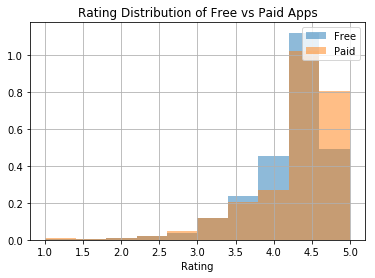

Ttest_indResult(statistic=3.1735494184478683, pvalue=0.0015119845969291425)


In [11]:
dfpaid = df[df.Type=='Paid'].dropna()
dffree = df[df.Type=='Free'].dropna()
(df[df.Type=='Free']['Rating']).hist(density=True,alpha=.5, label='Free')
(df[df.Type=='Paid']['Rating']).hist(density=True,alpha=.5, label='Paid')
plt.legend(loc='upper right')
plt.xlabel('Rating')
plt.title('Rating Distribution of Free vs Paid Apps')
plt.show()
print(ttest_ind(np.log(dfpaid.Rating), np.log(dffree.Rating)))

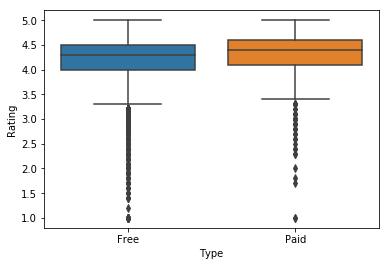

In [12]:
g = sns.boxplot(x='Type', y='Rating', data=df[(df.Type=='Free')|(df.Type=='Paid')])

Paid apps have higher ratings on average, and the t-test shows us that they have approximately 3 standard errors higher ratings than free apps with a .15% probability that the results are random. 

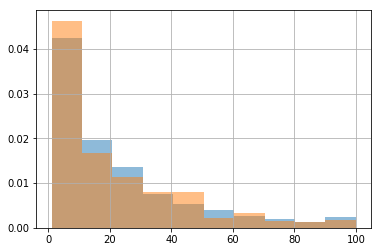

In [13]:
df[df.Type=='Free']['Size'].dropna().hist(density=True,alpha=.5, label='Free')
df[df.Type=='Paid']['Size'].dropna().hist(density=True,alpha=.5, label='Paid')

In [14]:
df2=df.groupby(['Category'])['Rating'].mean()
df2

Category
1.9                    19.000000
ART_AND_DESIGN          4.358065
AUTO_AND_VEHICLES       4.190411
BEAUTY                  4.278571
BOOKS_AND_REFERENCE     4.346067
BUSINESS                4.121452
COMICS                  4.155172
COMMUNICATION           4.158537
DATING                  3.970769
EDUCATION               4.389032
ENTERTAINMENT           4.126174
EVENTS                  4.435556
FAMILY                  4.192272
FINANCE                 4.131889
FOOD_AND_DRINK          4.166972
GAME                    4.286326
HEALTH_AND_FITNESS      4.277104
HOUSE_AND_HOME          4.197368
LIBRARIES_AND_DEMO      4.178462
LIFESTYLE               4.094904
MAPS_AND_NAVIGATION     4.051613
MEDICAL                 4.189143
NEWS_AND_MAGAZINES      4.132189
PARENTING               4.300000
PERSONALIZATION         4.335987
PHOTOGRAPHY             4.192114
PRODUCTIVITY            4.211396
SHOPPING                4.259664
SOCIAL                  4.255598
SPORTS                  4.223511
T

In [15]:
dfpaid.groupby('Category')['App'].count().sort_values(ascending=False).head()

Category
FAMILY             147
GAME                75
MEDICAL             71
PERSONALIZATION     50
TOOLS               41
Name: App, dtype: int64

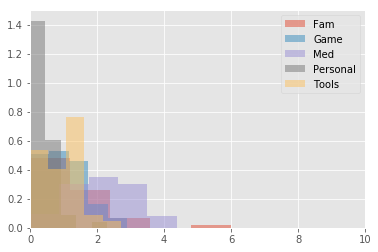

Ttest_indResult(statistic=5.686580134055979, pvalue=6.970902064330224e-08)


In [25]:
#Price/top 5 categories
familyapps = dfpaid[dfpaid.Category=='FAMILY']
gameapps = dfpaid[dfpaid.Category=='GAME']
medicalapps = dfpaid[dfpaid.Category=='MEDICAL']
personalapps = dfpaid[dfpaid.Category=='PERSONALIZATION']
toolapps = dfpaid[dfpaid.Category=='TOOLS']
plt.style.use('ggplot')

plt.hist(np.log(familyapps.Price), bins=5, density=True, alpha=.5, label='Fam')
plt.hist(np.log(gameapps.Price), bins=5, density=True, alpha=.5, label='Game')
plt.hist(np.log(medicalapps.Price), bins=5, density=True, alpha=.5, label='Med')
plt.hist(np.log(personalapps.Price), bins=5, density=True, alpha=.5, label='Personal')
plt.hist(np.log(toolapps.Price), bins=5, density=True, alpha=.5, label='Tools')


plt.legend(loc='upper right')
plt.xlim(0,10)
plt.show()

print(ttest_ind(medicalapps.Price, gameapps.Price))

In [17]:
dffree.groupby('Category')['App'].count().sort_values(ascending=False).head()

Category
FAMILY       1447
GAME          896
TOOLS         522
LIFESTYLE     257
FINANCE       250
Name: App, dtype: int64

In [18]:
print(df[df.Type=='Paid']['Reviews'].max())
print(df[df.Type=='Free']['Reviews'].max())

2376564.0
78158306.0


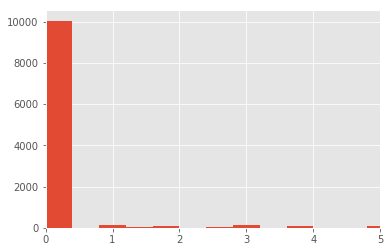

In [19]:
#price distribution
plt.hist(df.Price.dropna(), bins=1000)
plt.xlim(0,5)
plt.show()
#price*installs

#number of reivews
#ratings/reviews
#mean rating / installs, doesnt give good results because the installs column shows installs as categorical variables
#rather than continuous, for example 14456 installs will show as 10,000+

(array([  2.,  17.,  71.,  31., 121., 152.,  33.,  67.,  31.,   1.]),
 array([ 0.        ,  1.61180957,  3.22361913,  4.8354287 ,  6.44723826,
         8.05904783,  9.67085739, 11.28266696, 12.89447652, 14.50628609,
        16.11809565]),
 <a list of 10 Patch objects>)

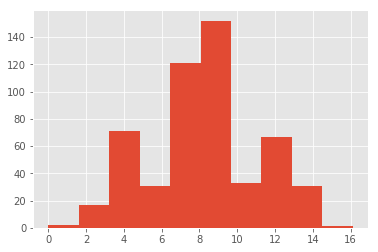

In [41]:
plt.hist(np.log(dfpaid.Installs))

(array([125., 173., 123.,  40.,  29.,  18.,   2.,   2.,   0.,  14.]),
 array([-0.00436481,  0.25627767,  0.51692015,  0.77756263,  1.03820511,
         1.29884759,  1.55949007,  1.82013255,  2.08077503,  2.34141751,
         2.60205999]),
 <a list of 10 Patch objects>)

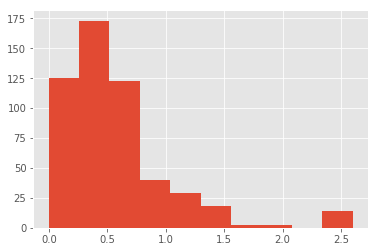

In [38]:
plt.hist(np.log10(dfpaid.Price))

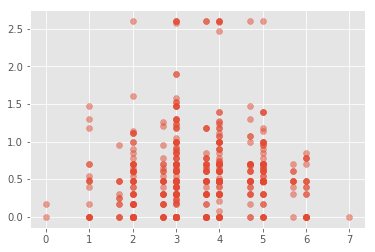

In [42]:
ratingperinstall = df.groupby('Installs', as_index=False).agg(np.mean)

plt.scatter(x=np.log10(dfpaid.Installs), y=np.log10(dfpaid.Price), alpha=.5)
#This graph is basically worthless due to the discontinuity of the installs category.

# The Plan
Paid apps typically have higher ratings, but overall they have lower install and review numbers than free apps. Will decreasing the cost of the app increase the revenue generated from app sales?

I hypothesize that decreasing the cost of paid apps will result in increased install rates and as a result increased revenue.

In addition to increased revenue from app sales, secondary variables we can measure are review and rating changes.

To test this hypothesis, a test group will see the apps in the app store with a -10% price tag. The control group will see the original price. 10% of google play accounts will see the app at a 10% price cut. 90% of accounts will see the normal price. After a month, the rate of installs for both subpopulations will be measured. In addition, ratings and review counts between the 2 subpopulations will be compared. We will also measure the rates as grouped by categories to see which categories of apps are more price-dependent.

If the test is successful, the 10% decrease in cost for the apps will increase install rates and result in a higher revenue for most/all apps.

We can also look at sources of app revenue from other sources, and see if the app brings in revenue from ads and in-app purchases.